In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {
    'age': np.random.randint(30, 61, 500),
    'salary': np.random.randint(50000, 500001, 500),
    'num_members': np.random.randint(2, 11, 500),
    'buys_flat': np.random.choice([0, 1], 500)
}
data

{'age': array([52, 39, 59, 33, 31, 52, 57, 58, 35, 37, 54, 56, 45, 58, 55, 54, 57,
        56, 50, 41, 42, 31, 37, 43, 48, 51, 50, 58, 54, 48, 39, 58, 38, 51,
        44, 48, 45, 42, 48, 52, 56, 56, 41, 36, 37, 54, 42, 39, 59, 43, 48,
        42, 40, 52, 50, 34, 37, 42, 32, 47, 31, 43, 59, 53, 40, 45, 42, 57,
        52, 33, 37, 54, 30, 43, 50, 30, 57, 51, 41, 55, 34, 47, 42, 58, 49,
        60, 30, 49, 57, 32, 37, 31, 33, 48, 50, 51, 44, 36, 41, 44, 46, 31,
        48, 51, 44, 33, 56, 55, 38, 40, 42, 34, 57, 43, 38, 58, 50, 59, 31,
        46, 50, 42, 30, 38, 53, 47, 42, 58, 55, 60, 41, 59, 43, 55, 34, 53,
        52, 39, 50, 40, 43, 47, 44, 45, 46, 42, 42, 36, 45, 60, 43, 42, 59,
        51, 36, 41, 39, 56, 60, 60, 34, 60, 38, 38, 30, 31, 58, 40, 41, 51,
        38, 56, 47, 31, 51, 54, 52, 60, 33, 41, 45, 37, 45, 51, 36, 33, 57,
        60, 51, 54, 41, 54, 40, 35, 32, 38, 49, 51, 37, 52, 30, 53, 60, 36,
        39, 59, 59, 60, 33, 36, 51, 35, 39, 35, 48, 47, 40, 32, 35, 56, 54,
     

In [3]:
df = pd.DataFrame(data) 
df

,age,salary,num_members,buys_flat
0,52,425508,2,1
1,39,107895,3,1
2,59,324628,2,1
3,33,265701,7,1
4,31,159339,10,0
...,...,...,...,...
495,41,201004,10,0
496,41,431882,7,0
497,35,66217,7,0
498,58,130979,6,1


In [4]:
x = df.drop('buys_flat', axis=1)  # All columns except 'buys_flat'
y = df['buys_flat'] 
x

,age,salary,num_members
0,52,425508,2
1,39,107895,3
2,59,324628,2
3,33,265701,7
4,31,159339,10
...,...,...,...
495,41,201004,10
496,41,431882,7
497,35,66217,7
498,58,130979,6


In [5]:
y

0      1
1      1
2      1
3      1
4      0
      ..
495    0
496    0
497    0
498    1
499    1
Name: buys_flat, Length: 500, dtype: int32

In [6]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , stratify = y , random_state = 1)

In [7]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     age  salary  num_members
234   43  119789            4
208   33  297817            3
191   54  485506            8
339   47  393317            2
470   32   57084            3
..   ...     ...          ...
131   59  188703            8
176   52  253188            5
105   33  271846           10
123   38  217746            9
280   43  242314            5

[350 rows x 3 columns]
     age  salary  num_members
153   51  444236            5
420   54  100788            2
310   58  438437            4
467   47  166869            4
409   42  416371            4
..   ...     ...          ...
231   51  425872            3
376   38  161738            6
308   39  325704           10
221   36  337296            9
142   44  499321            4

[150 rows x 3 columns]
234    1
208    0
191    1
339    1
470    1
      ..
131    1
176    1
105    0
123    1
280    0
Name: buys_flat, Length: 350, dtype: int32
153    0
420    0
310    1
467    1
409    1
      ..
231    1
376    0
308    0
221    0


In [8]:
import matplotlib.pyplot as plt

In [9]:
sal_mean = x_train['salary'].mean()
age_mean = x_train['age'].mean()
num_mean = x_train['num_members'].mean()
x_train['salary'].map(lambda x: 0 if x < sal_mean else 1)

234    0
208    1
191    1
339    1
470    0
      ..
131    0
176    0
105    0
123    0
280    0
Name: salary, Length: 350, dtype: int64

In [10]:
x_train['age'].map(lambda x:0 if x < age_mean else 1 )

234    0
208    0
191    1
339    1
470    0
      ..
131    1
176    1
105    0
123    0
280    0
Name: age, Length: 350, dtype: int64

In [11]:
x_train['num_members'].map(lambda x:0 if x < num_mean else  1)

234    0
208    0
191    1
339    0
470    0
      ..
131    1
176    0
105    1
123    1
280    0
Name: num_members, Length: 350, dtype: int64

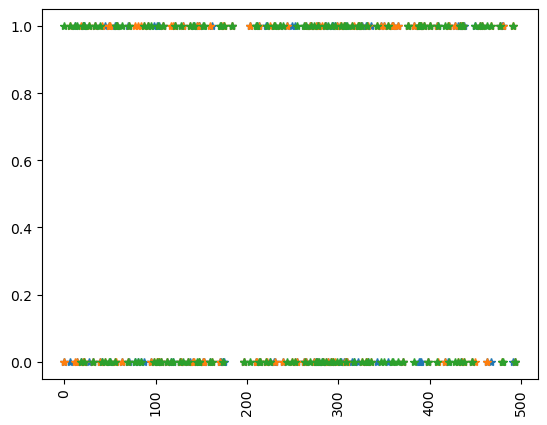

In [13]:
x_binarised_test = x_test.apply(pd.cut, bins=2, labels=[1,0])
x_binarised_train = x_train.apply(pd.cut, bins=2, labels=[1,0])
type(x_binarised_train)

plt.plot(x_binarised_test, '*')
plt.xticks(rotation='vertical')
plt.show()

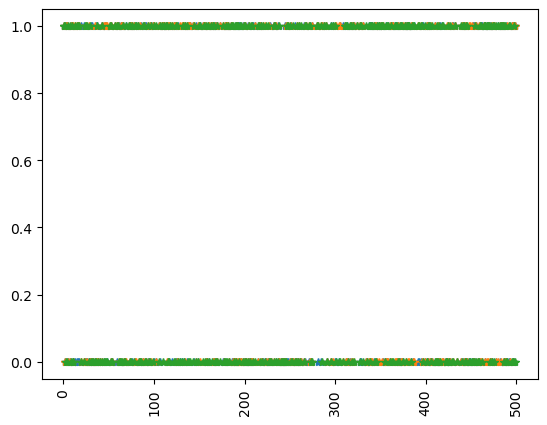

In [14]:
plt.plot(x_binarised_train, '*')
plt.xticks(rotation='vertical')
plt.show()

In [15]:
x_binarised_test = x_binarised_test.values
x_binarised_train = x_binarised_train.values

In [16]:
type(x_binarised_train)

numpy.ndarray

In [17]:
from random import randint
b = randint(0,3)
from sklearn.metrics import accuracy_score , confusion_matrix

In [18]:
y_pred_test = []

for x in x_binarised_test:
  y_pred = (np.sum(x) >= b)
  y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test, y_test)

print(b, accuracy) 

1 0.54


In [19]:
y_pred_train = []
accurate_rows = 0

for x, y in zip(x_binarised_train, y_train):
  y_pred = (np.sum(x) >= b)
  y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred)
  
print(accurate_rows, accurate_rows/x_binarised_train.shape[0])

170 0.4857142857142857


In [20]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [21]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_train, y_train)

Optimal value of b is 0
Highest accuracy is 0.5228571428571429


In [22]:
y_test_pred = mp_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(y_test_pred, y_test)
cm = confusion_matrix(y_test_pred,y_test)
cm

array([[ 0,  0],
       [72, 78]], dtype=int64)

In [23]:
print(accuracy_test)

0.52
